In [13]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load and Subset Data

<Item title:"SAC_Erosion_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
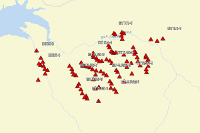

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('3e8857f8aad9434ca6ac42909e1a3a60')

points = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [3]:
# Merge related table and feature layer
data = points.merge(observations, left_on='GlobalID', right_on='Ref_to_Points', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Points'])
data = data.rename(columns={'GlobalID_y':'Record_GlobalID', 'OBJECTID_y':'Record_ObjectID','OBJECTID_x':'Point_ObjectID'})
data.head()

,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL
0,1,SAC,ET 3.1S-1,Ephemeral Tributary 3.1S,Gully Erosion – Moderate Gully Formed on Hills...,"{'x': 6185464.020900801, 'y': 2033556.48733781...",1,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2019-04-11 02:55:15,29dbb17f-8578-4f01-95ea-a69f3d26cd59,Some recent erosion in gully and along adjacen...
1,1,SAC,ET 3.1S-1,Ephemeral Tributary 3.1S,Gully Erosion – Moderate Gully Formed on Hills...,"{'x': 6185464.020900801, 'y': 2033556.48733781...",97,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,No Change,No,No,20.65 feet from rebar to top knickpoint of hea...,Stabilizing,2020-04-20 17:56:20,f274e9c0-eac1-49a9-94d9-b193129a1ea8,"rebar still present from previous years, some ..."
2,1,SAC,ET 3.1S-1,Ephemeral Tributary 3.1S,Gully Erosion – Moderate Gully Formed on Hills...,"{'x': 6185464.020900801, 'y': 2033556.48733781...",197,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,"pin present, not measured due to low severity",Stabilizing,2021-04-19 17:58:48,7ad34c5d-14e9-4f11-92ee-6a24e0a9570e,some headward erosion in gully and localized a...
3,2,SAC,ET 3.1S-2,Ephemeral Tributary 3.1S,Gully Erosion – Moderate Gully Formed on Hills...,"{'x': 6185394.202470884, 'y': 2033746.81143222...",2,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2019-04-11 03:00:58,dec1e8cc-3bc0-4c24-a92e-b2bf917d0669,"Bare vertical slopes with some erosion, featur..."
4,2,SAC,ET 3.1S-2,Ephemeral Tributary 3.1S,Gully Erosion – Moderate Gully Formed on Hills...,"{'x': 6185394.202470884, 'y': 2033746.81143222...",99,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,No Change,No,No,old rebar sticks out 2.04 feet,Stabilizing,2020-04-20 18:39:36,784f51ea-ff5c-430f-9742-e59226f8fa8c,"a little fallen debris, not much sediment adde..."


In [4]:
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 99


# QAQC

In [5]:
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,{Ryan Wood}
0,Surveyor_2,"{Jason Pearson, Joanne Nghiem}"




Table/Layer:  Stations


No Mismatches Found


In [6]:
QAQC_whitespace(data, exclude_cols=['CommentsL', 'EPinNotes','Feature_Description'], objectID=['Record_ID'])



Analysis for: CompType
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Severity
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Record_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: NewLocatio
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Status
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: RatingChan
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing wh

In [7]:
find_blank_entries(sub, exclude_cols=['CompType','HabType','Surveyor_2','EPinNotes'])

No blank Severity
No blank Record_GlobalID
No blank CommentsL
No blank Point_ObjectID
No blank NewLocatio
No blank Status
No blank RatingChan
No blank SHAPE
No blank Record_ObjectID
No blank Feature_Description
No blank Station_ID
No blank BHR_Site
No blank Observation_Date
No blank ErosionPin
No blank Location_Description
No blank Surveyor_1


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


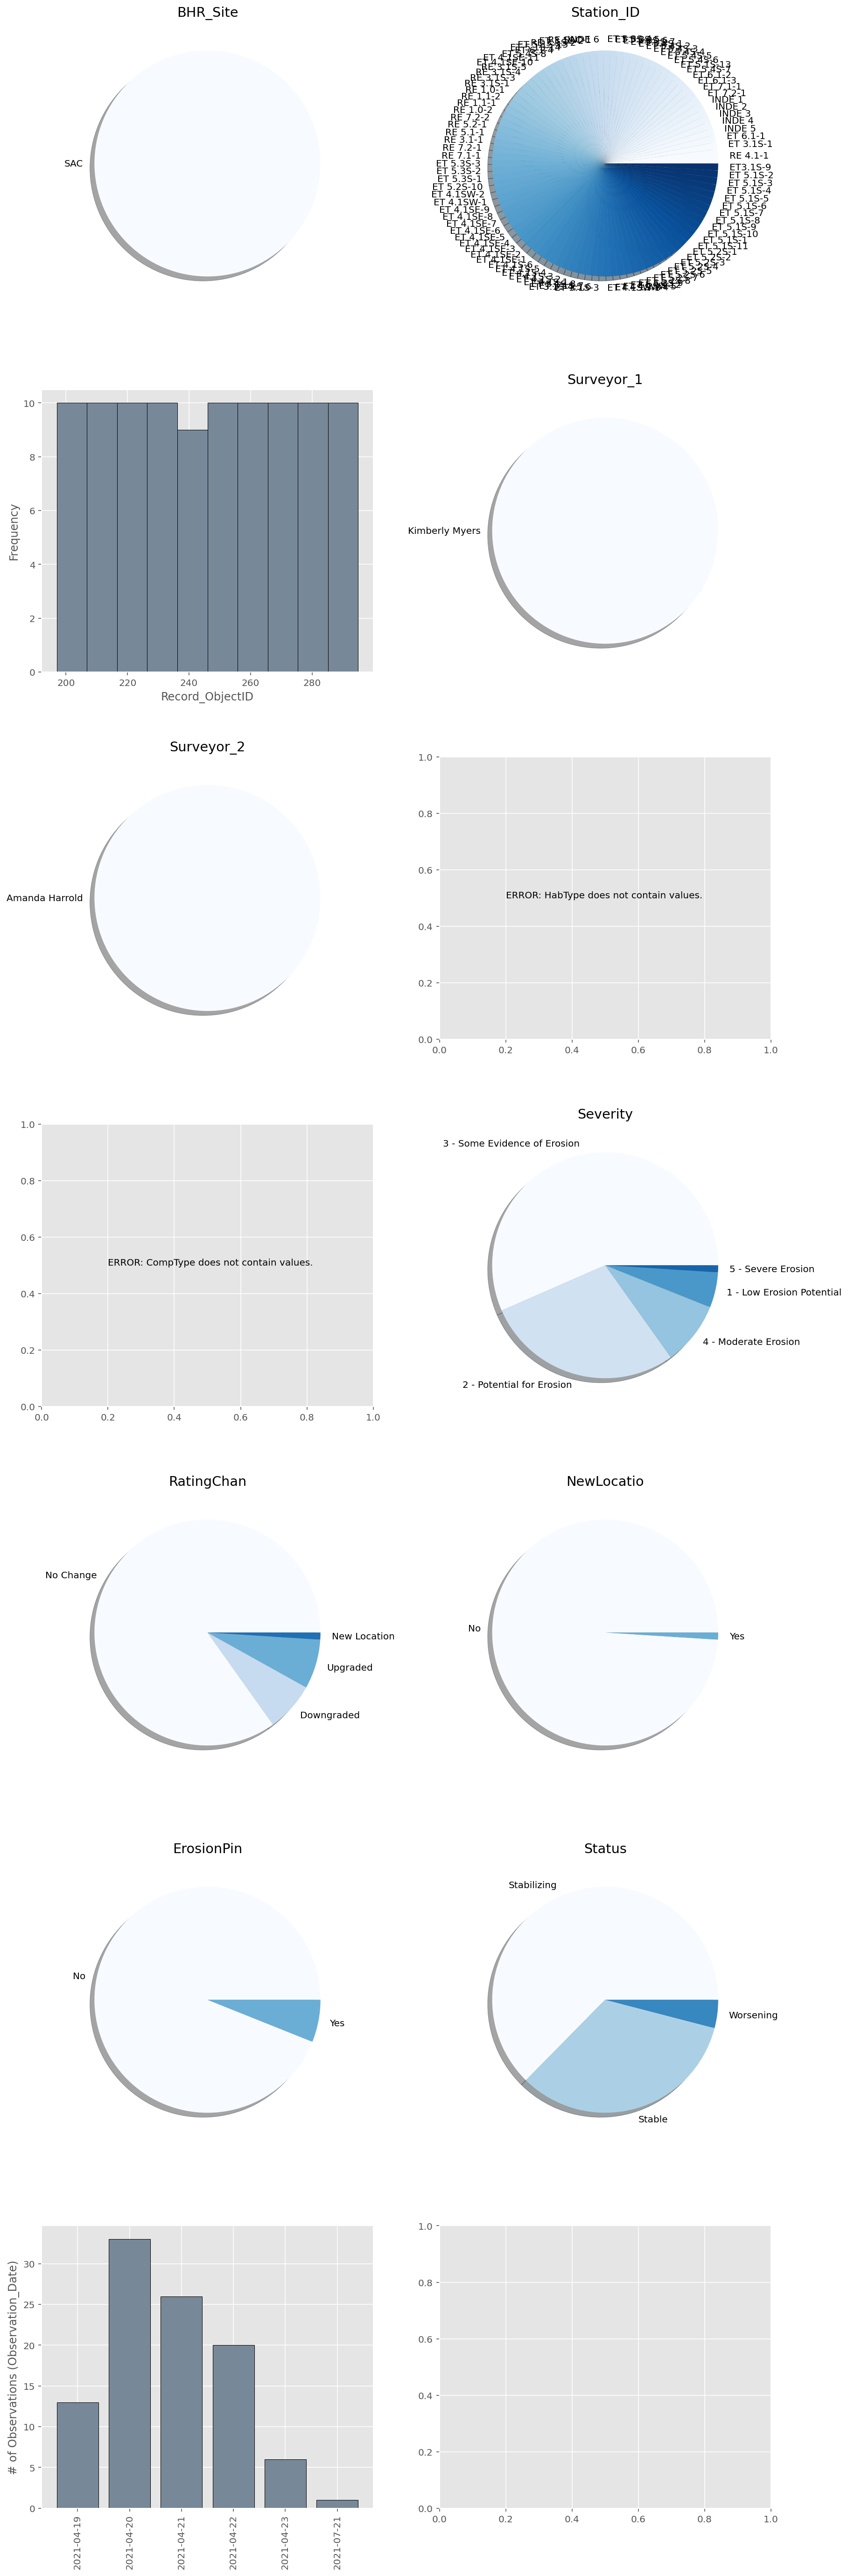

In [8]:
QAQC_plot(sub, ['BHR_Site', 'Station_ID', 
     'Record_ObjectID', 'Surveyor_1', 'Surveyor_2',
       'HabType', 'CompType', 'Severity', 'RatingChan', 'NewLocatio',
       'ErosionPin',  'Status', 'Observation_Date'])

TypeError: '>=' not supported between instances of 'int' and 'str'

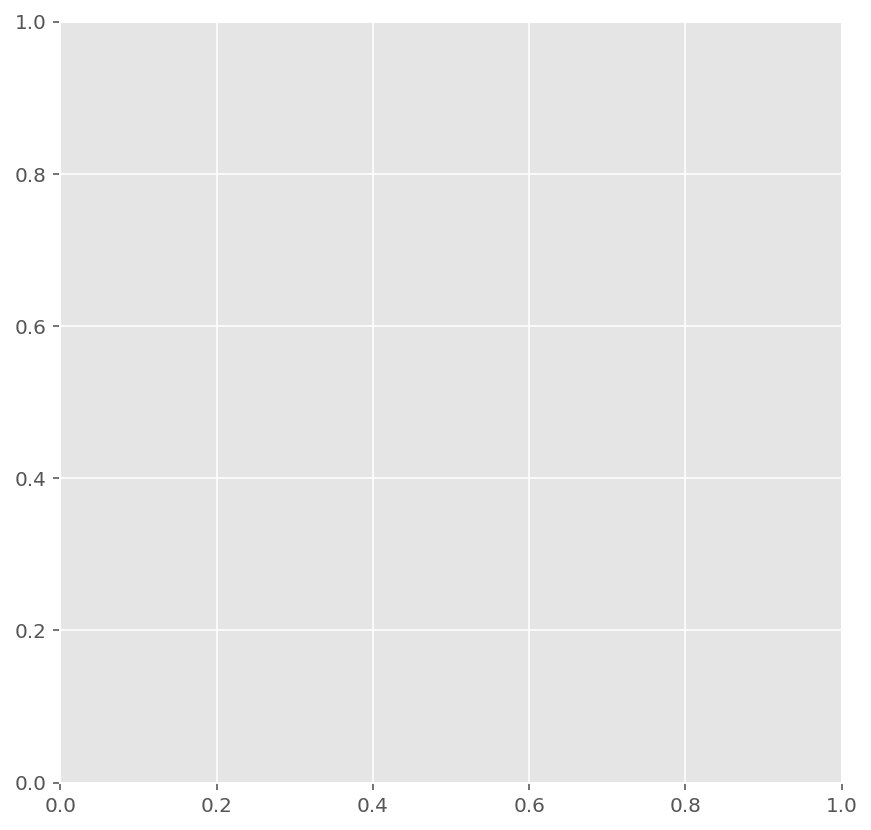

In [9]:
compare_years_continuous(sub, 'Severity', '2019', '2020', 15)

In [11]:
pin_nunique = data.groupby('Station_ID').ErosionPin.nunique()

print('Verify pin presence data at these stations:\n',pin_nunique.loc[pin_nunique > 1])

Verify pin presence data at these stations:
 Station_ID
ET 5.1S-11    2
RE 5.2-1      2
Name: ErosionPin, dtype: int64


In [0]:
data = data.sort_values('Observation_Date', ascending=False)

In [10]:
def sever_str_to_int(severity_str):
    if severity_str == '1 - Low Erosion Potential':
        severity_int = 1
    elif severity_str == '2 - Potential for Erosion':
        severity_int = 2
    elif severity_str == '3 - Some Evidence of Erosion':
        severity_int = 3
    elif severity_str == '4 - Moderate Erosion':
        severity_int = 4
    elif severity_str == '5 - Severe Erosion':
        severity_int = 5
    else:
        severity_int = None
        
    return severity_int

In [12]:
#Check Rating Changes

data['Severity_int'] = data.Severity.apply(sever_str_to_int)

groups = data.groupby('Station_ID')

errorflag = False
for name, group in groups:
    group_r = group.reset_index()
    
    if len(group_r) == 1:
        if group_r.loc[0,'RatingChan'] != 'New Location':
            print("ERROR: New station not set to Rating Change = 'New Location'")
            display(group_r)
            errorflag=True
    else:
        for row in range(0,len(group_r)-1):
            cur_change = group_r.loc[row,'RatingChan']
            cur_severity = group_r.loc[row,'Severity_int']
            prev_severity = group_r.loc[row+1,'Severity_int']

            change = cur_severity - prev_severity

            if change == 0:
                if group_r.loc[0,'RatingChan'] != 'No Change':
                    print("ERROR: Rating Change entry should = 'No Change'")
                    display(group_r.loc[row,'Station_ID'])
                    errorflag=True

            elif change > 0:
                if group_r.loc[0,'RatingChan'] != 'Upgraded':
                    print("ERROR: Rating Change entry should = 'Upgraded'")
                    display(group_r)
                    errorflag=True
            elif change < 0:
                if group_r.loc[0,'RatingChan'] != 'Downgraded':
                    print("ERROR: Rating Change entry should = 'Downgraded'")
                    display(group_r)
                    errorflag=True
            else:
                print('script/data error')
            
if not errorflag:
    print('No errors found in Rating Change field')

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,9,4,SAC,"ET 3.1S-4,5,6",Ephemeral Tributary 3.1S,Gully Erosion – 3-Tiered Zone of Knickpoints in Subdrainage of Tri...,"{'x': 6184864.608713806, 'y': 2034639.0386503935, 'spatialReferenc...",4,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-11 03:47:03,a1b1b148-9f83-4266-afef-88d19613b2eb,Knickpoints are not growing or developing into gullies and appear ...,2
1,10,4,SAC,"ET 3.1S-4,5,6",Ephemeral Tributary 3.1S,Gully Erosion – 3-Tiered Zone of Knickpoints in Subdrainage of Tri...,"{'x': 6184864.608713806, 'y': 2034639.0386503935, 'spatialReferenc...",103,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,"old pin identified on lowest knickpoint = 16.00 feet, old pin iden...",Stabilizing,2020-04-20 20:23:19,281367f5-c71b-400d-83c2-fbff72e93099,"some bank scour and hoof shear along cattle trails, knickpoints al...",3
2,11,4,SAC,"ET 3.1S-4,5,6",Ephemeral Tributary 3.1S,Gully Erosion – 3-Tiered Zone of Knickpoints in Subdrainage of Tri...,"{'x': 6184864.608713806, 'y': 2034639.0386503935, 'spatialReferenc...",202,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,"pins present, not measured due to severity rating",Stabilizing,2021-04-19 19:43:33,5632d8ba-9978-47cc-a5c4-c875e70580ff,some erosion due to hoof shear and animal burrows,3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,12,5,SAC,ET 3.1S-7,Ephemeral Tributary 3.1S,"Channel Erosion – Entrenched Channel, Knickpoint, and Sedimentation","{'x': 6184610.857483197, 'y': 2035188.8764879552, 'spatialReferenc...",5,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-11 03:52:12,7200d84b-e265-4085-b588-7333b2a6b288,"Mostly well vegetated, no recent erosion",2
1,13,5,SAC,ET 3.1S-7,Ephemeral Tributary 3.1S,"Channel Erosion – Entrenched Channel, Knickpoint, and Sedimentation","{'x': 6184610.857483197, 'y': 2035188.8764879552, 'spatialReferenc...",105,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,"old pin measures 1.23 feet, consider moving feature upstream",Stabilizing,2020-04-20 21:07:10,f447745b-2997-4329-91a0-e186658801ff,"channel bed scour upstream of original feature, original feature i...",3
2,14,5,SAC,ET 3.1S-7,Ephemeral Tributary 3.1S,"Channel Erosion – Entrenched Channel, Knickpoint, and Sedimentation","{'x': 6184610.857483197, 'y': 2035188.8764879552, 'spatialReferenc...",205,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-19 21:20:13,4aea3483-04e8-4c17-82bb-2170291f588b,"channel bottom is soft sediment with animal burrows, some exposed ...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,15,6,SAC,ET 3.1S-8,Ephemeral Tributary 3.1S,"Bank Erosion – Cattle Trail Crossing Over Drainage, Incised Banks","{'x': 6184364.269491389, 'y': 2035756.6404178145, 'spatialReferenc...",6,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-11 04:03:30,165fb055-d649-431a-9366-a9e75af6a9a1,"No new erosion, potential for erosion by cattle with minimal impac...",2
1,16,6,SAC,ET 3.1S-8,Ephemeral Tributary 3.1S,"Bank Erosion – Cattle Trail Crossing Over Drainage, Incised Banks","{'x': 6184364.269491389, 'y': 2035756.6404178145, 'spatialReferenc...",107,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,Add incised banks to feature description,Stabilizing,2020-04-20 21:56:59,5941c554-2175-4756-8bc4-0f22006a72bf,"Bank scour, sparse vegetation on vertical slope upstream of featur...",3
2,17,6,SAC,ET 3.1S-8,Ephemeral Tributary 3.1S,"Bank Erosion – Cattle Trail Crossing Over Drainage, Incised Banks","{'x': 6184364.269491389, 'y': 2035756.6404178145, 'spatialReferenc...",206,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-19 21:39:48,946298bf-9887-4ea1-8800-47ed045319d4,"Incised channel, some loose sediment on channel bottom, some expos...",3


ERROR: Rating Change entry should = 'No Change'


'ET 4.1S-5'

ERROR: Rating Change entry should = 'No Change'


'ET 4.1SE-10'

ERROR: Rating Change entry should = 'No Change'


'ET 4.1SE-11'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,45,16,SAC,ET 4.1SE-4,Ephemeral Tributary 4.1SE,Gully Erosion – Moderate Gully Formed on Hillslope With Rill Erosi...,"{'x': 6187313.615298718, 'y': 2034637.8936395645, 'spatialReferenc...",16,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2019-04-11 00:35:59,b5633d47-bb26-42f3-ba9f-80d1dbeef35e,Some undercutting of channel bank,3
1,46,16,SAC,ET 4.1SE-4,Ephemeral Tributary 4.1SE,Gully Erosion – Moderate Gully Formed on Hillslope With Rill Erosi...,"{'x': 6187313.615298718, 'y': 2034637.8936395645, 'spatialReferenc...",134,Kimberly Myers,Jason Pearson,None,None,4 - Moderate Erosion,Upgraded,No,No,Not installed due to slope stability,Worsening,2020-04-22 18:20:51,74aa9590-854a-4074-b620-f8dfe7c14c4f,"undercutting on cutbank, knickpoints and channel re-direction from...",4
2,47,16,SAC,ET 4.1SE-4,Ephemeral Tributary 4.1SE,Gully Erosion – Moderate Gully Formed on Hillslope With Rill Erosi...,"{'x': 6187313.615298718, 'y': 2034637.8936395645, 'spatialReferenc...",225,Kimberly Myers,Amanda Harrold,None,None,4 - Moderate Erosion,No Change,No,No,None,Stabilizing,2021-04-20 19:54:04,cdc57bc3-8f64-4b10-a823-6bbc50f9e58d,"some erosion on channel banks, slight undercutting under tree, cat...",4


ERROR: Rating Change entry should = 'No Change'


'ET 4.1SE-5'

ERROR: Rating Change entry should = 'No Change'


'ET 4.1SE-5'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,69,24,SAC,ET 4.1SW-3,Ephemeral Tributary 4.1SW,Gully Erosion – Small Succession of Knickpoints in Subdrainage of ...,"{'x': 6186240.174633015, 'y': 2034498.63321999, 'spatialReference'...",24,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 23:28:00,b3a629cb-8776-4bef-beb7-7f2935599dd0,"Well vegetated, small knickpoint with no sign of recent erosion, k...",2
1,70,24,SAC,ET 4.1SW-3,Ephemeral Tributary 4.1SW,Gully Erosion – Small Succession of Knickpoints in Subdrainage of ...,"{'x': 6186240.174633015, 'y': 2034498.63321999, 'spatialReference'...",141,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-22 21:29:48,68def730-88f5-45b3-b1ea-0081f8f442ad,Gully knickpoints have diffused into the slope with only minor hoo...,3
2,71,24,SAC,ET 4.1SW-3,Ephemeral Tributary 4.1SW,Gully Erosion – Small Succession of Knickpoints in Subdrainage of ...,"{'x': 6186240.174633015, 'y': 2034498.63321999, 'spatialReference'...",218,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2021-04-20 17:59:31,a7a4402a-baca-4947-a5ce-dbc91c6572e2,"Well vegetated, knickpoints up to 6 inches deep with some hoof she...",2


ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,69,24,SAC,ET 4.1SW-3,Ephemeral Tributary 4.1SW,Gully Erosion – Small Succession of Knickpoints in Subdrainage of ...,"{'x': 6186240.174633015, 'y': 2034498.63321999, 'spatialReference'...",24,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 23:28:00,b3a629cb-8776-4bef-beb7-7f2935599dd0,"Well vegetated, small knickpoint with no sign of recent erosion, k...",2
1,70,24,SAC,ET 4.1SW-3,Ephemeral Tributary 4.1SW,Gully Erosion – Small Succession of Knickpoints in Subdrainage of ...,"{'x': 6186240.174633015, 'y': 2034498.63321999, 'spatialReference'...",141,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-22 21:29:48,68def730-88f5-45b3-b1ea-0081f8f442ad,Gully knickpoints have diffused into the slope with only minor hoo...,3
2,71,24,SAC,ET 4.1SW-3,Ephemeral Tributary 4.1SW,Gully Erosion – Small Succession of Knickpoints in Subdrainage of ...,"{'x': 6186240.174633015, 'y': 2034498.63321999, 'spatialReference'...",218,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2021-04-20 17:59:31,a7a4402a-baca-4947-a5ce-dbc91c6572e2,"Well vegetated, knickpoints up to 6 inches deep with some hoof she...",2


ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,72,25,SAC,ET 4.1SW-4,Ephemeral Tributary 4.1SW,Gully Erosion – Knickpoint Erosion in Tributary 4.1SW,"{'x': 6186059.12918404, 'y': 2034938.2462425355, 'spatialReference...",25,Ryan Wood,Kimberly Myers,None,None,4 - Moderate Erosion,No Change,No,No,No erosion pin due to slope stability concerns,Stabilizing,2019-04-10 23:14:50,00e93848-60e7-4421-9e36-44bec86c13d3,"Erosion still active with some fresh slumping, cattle trails are a...",4
1,73,25,SAC,ET 4.1SW-4,Ephemeral Tributary 4.1SW,Gully Erosion – Knickpoint Erosion in Tributary 4.1SW,"{'x': 6186059.12918404, 'y': 2034938.2462425355, 'spatialReference...",142,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Downgraded,No,No,"this location may need to be adjusted/updated, consider if knickpo...",Stabilizing,2020-04-22 21:48:00,fab249a0-cab8-4f52-929f-5bf03cfb39b3,"Hillslope erosion is vegetated and appears to be stabilizing, spar...",3
2,74,25,SAC,ET 4.1SW-4,Ephemeral Tributary 4.1SW,Gully Erosion – Knickpoint Erosion in Tributary 4.1SW,"{'x': 6186059.12918404, 'y': 2034938.2462425355, 'spatialReference...",217,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-20 17:42:03,5e3ecfe5-f233-4a2f-8803-42e0c3fd2ced,Changed description of hillslope erosion to a series of knickpoint...,3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,78,27,SAC,ET 5.1S-1,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6188263.117008641, 'y': 2034766.8192347288, 'spatialReferenc...",27,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 00:24:57,6fa3d143-18b3-44fc-a6ef-c2c3544c9e72,"Mostly well vegetated, some vertical slopes, minimal erosion since...",2
1,79,27,SAC,ET 5.1S-1,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6188263.117008641, 'y': 2034766.8192347288, 'spatialReferenc...",174,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-24 18:02:31,003ce2b0-9a44-4e56-b793-bea2b4dc2ca9,"some debris fall at top of gully, small amount of erosion in knick...",3
2,80,27,SAC,ET 5.1S-1,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6188263.117008641, 'y': 2034766.8192347288, 'spatialReferenc...",258,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-21 19:13:09,48e057ae-a893-430d-a119-a78fb01135e4,"some bare slopes and erosion at bottom of gully, gully walls are w...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,105,36,SAC,ET 5.1S-10,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Potential fo...,"{'x': 6186203.832085222, 'y': 2036539.5102431476, 'spatialReferenc...",36,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-09 23:07:25,8b4cfbe7-5c20-46fb-a0db-0373e9dae421,"Slopes are moderately vegetated with no recent erosion, slope is n...",2
1,106,36,SAC,ET 5.1S-10,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Potential fo...,"{'x': 6186203.832085222, 'y': 2036539.5102431476, 'spatialReferenc...",186,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-24 21:00:16,fe648789-613d-4760-89e3-5697ec6b6c5b,"some vertical banks with sparse vegetation and animal burrowing, s...",3
2,107,36,SAC,ET 5.1S-10,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Potential fo...,"{'x': 6186203.832085222, 'y': 2036539.5102431476, 'spatialReferenc...",246,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-21 17:21:30,094591c9-4400-4c37-a126-d460f67baa23,"some minor erosion, mostly moderately vegetated slopes under oak t...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,108,37,SAC,ET 5.1S-11,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6185993.626796976, 'y': 2036637.0996148884, 'spatialReferenc...",37,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2019-04-09 23:00:48,c7d7b2eb-6eeb-42db-b77f-af545cfa1c57,"Small amount of erosion/slumping along bank, vertical bank is mode...",3
1,109,37,SAC,ET 5.1S-11,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6185993.626796976, 'y': 2036637.0996148884, 'spatialReferenc...",187,Kimberly Myers,Jason Pearson,None,None,4 - Moderate Erosion,Upgraded,No,Yes,"pin is 20.20 feet from knickpoint, 14.07 from undercut, and 13.61 ...",Worsening,2020-04-24 21:09:29,d711ffcb-25b8-43bc-8be7-3b47c827269a,"some erosion on vertical bank and knickpoint is cutting upstream, ...",4
2,110,37,SAC,ET 5.1S-11,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6185993.626796976, 'y': 2036637.0996148884, 'spatialReferenc...",245,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,Downgraded,No,No,"pin present but not actively monitoring due to severity rating, pi...",Stabilizing,2021-04-21 17:06:27,1f309884-e1cc-4601-a472-cb2cab2ac9e9,"some erosion on exposed vertical bank due to animal burrows, poten...",3


ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-12'

ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-12'

ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,219,74,SAC,ET 5.1S-13,Ephemeral Tributary 5.1s,Hillslope Erosion – Steep Bank and Slumping Hillslope,"{'x': 6186441.321439639, 'y': 2036319.192114234, 'spatialReference...",74,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2019-04-09 23:18:48,e2cff998-602e-4c23-91ff-4c354a0b17fb,"Small amount of erosion at toe of slope, moderate vegetation, some...",3
1,220,74,SAC,ET 5.1S-13,Ephemeral Tributary 5.1s,Hillslope Erosion – Steep Bank and Slumping Hillslope,"{'x': 6186441.321439639, 'y': 2036319.192114234, 'spatialReference...",184,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2020-04-24 20:49:41,f3c0e833-4ad8-45ee-a68e-805de19f35bc,Slump on hillslope is moderately to well vegetated with no new sig...,3
2,221,74,SAC,ET 5.1S-13,Ephemeral Tributary 5.1s,Hillslope Erosion – Steep Bank and Slumping Hillslope,"{'x': 6186441.321439639, 'y': 2036319.192114234, 'spatialReference...",248,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2021-04-21 17:52:07,1a850b34-adb4-4494-ac3c-89acb8f1afa8,"moderate to well vegetated slope, former slump, no recent erosion",2


ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-14'

ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-15'

ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-3'

ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,87,30,SAC,ET 5.1S-4,Ephemeral Tributary 5.1S,Hillslope Erosion – Hillslope Slumping,"{'x': 6187669.229088798, 'y': 2035627.2190887332, 'spatialReferenc...",30,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Downgraded,No,No,None,Stabilizing,2019-04-09 23:49:03,472dca80-17d9-47c9-925c-e778330a0f53,"No new slope movement since last year, some bare areas still prese...",3
1,88,30,SAC,ET 5.1S-4,Ephemeral Tributary 5.1S,Hillslope Erosion – Hillslope Slumping,"{'x': 6187669.229088798, 'y': 2035627.2190887332, 'spatialReferenc...",178,Kimberly Myers,Jason Pearson,None,None,2 - Potential for Erosion,Downgraded,No,No,knickpoint adjacent to feature - could be considered a new location?,Stable,2020-04-24 19:07:01,8af73bfd-109a-42a2-bb52-4643071fb14e,"Hillslope is moderately to well vegetated, toe of slump is grown o...",2
2,89,30,SAC,ET 5.1S-4,Ephemeral Tributary 5.1S,Hillslope Erosion – Hillslope Slumping,"{'x': 6187669.229088798, 'y': 2035627.2190887332, 'spatialReferenc...",254,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2021-04-21 18:45:46,e0f71800-344b-4428-b129-4092b117b213,"small knickpoint adjacent to feature with hoof shear, but no recen...",2


ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-4'

ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-5'

ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,99,34,SAC,ET 5.1S-8,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope Slumping,"{'x': 6186612.556989551, 'y': 2036337.2153721452, 'spatialReferenc...",34,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Downgraded,No,No,None,Stabilizing,2019-04-09 23:22:43,a2ee43de-f559-4121-bb1c-f456ea4fdeb2,"Well vegetated, slumping hillslope does not appear to have any new...",3
1,100,34,SAC,ET 5.1S-8,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope Slumping,"{'x': 6186612.556989551, 'y': 2036337.2153721452, 'spatialReferenc...",183,Kimberly Myers,Jason Pearson,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2020-04-24 20:40:36,c04f0bce-db17-4e5b-9492-f58d4997c683,"Well vegetated with some cattle terraces, but no recent erosion",2
2,101,34,SAC,ET 5.1S-8,Ephemeral Tributary 5.1S,Bank Erosion – Steep Bank and Adjacent Hillslope Slumping,"{'x': 6186612.556989551, 'y': 2036337.2153721452, 'spatialReferenc...",249,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2021-04-21 17:58:14,4f281d84-7566-434a-9c74-b3c87055688f,well vegetated slopes no sign of recent erosion except one animal ...,2


ERROR: Rating Change entry should = 'No Change'


'ET 5.1S-8'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,102,35,SAC,ET 5.1S-9,Ephemeral Tributary 5.1S,"Bank Erosion – Steep Bank, Knickpoint, and Adjacent Hillslope With...","{'x': 6186299.379459485, 'y': 2036363.7869779496, 'spatialReferenc...",35,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-09 23:13:11,3a09e2e3-ad93-47c4-a596-7245279d87fc,"Well vegetated, not vertical slopes, small wetland area present al...",2
1,103,35,SAC,ET 5.1S-9,Ephemeral Tributary 5.1S,"Bank Erosion – Steep Bank, Knickpoint, and Adjacent Hillslope With...","{'x': 6186299.379459485, 'y': 2036363.7869779496, 'spatialReferenc...",185,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,Add knickpoint to feature description,Stabilizing,2020-04-24 20:54:18,25b5183f-4649-49ea-9661-82d5219787e5,"Some erosion at head of knickpoint, incised channel is well vegeta...",3
2,104,35,SAC,ET 5.1S-9,Ephemeral Tributary 5.1S,"Bank Erosion – Steep Bank, Knickpoint, and Adjacent Hillslope With...","{'x': 6186299.379459485, 'y': 2036363.7869779496, 'spatialReferenc...",247,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,location adjusted to knickpoint,Stabilizing,2021-04-21 17:29:11,4a4c50d2-ecc4-49d9-b27e-61367ad941a6,"no recent hillslope erosion, knickpoint and plunge pool upstream o...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,117,40,SAC,ET 5.2S-2,Ephemeral Tributary 5.2S,Gully Erosion – Small Succession of Knickpoints in Upper Part of T...,"{'x': 6188463.751121804, 'y': 2035867.4167710545, 'spatialReferenc...",40,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 01:00:00,6a0b317c-2dc1-4fad-9e1a-76f98e60a9a1,"No erosion in gully, knickpoints have some erosion, but mostly unc...",2
1,118,40,SAC,ET 5.2S-2,Ephemeral Tributary 5.2S,Gully Erosion – Small Succession of Knickpoints in Upper Part of T...,"{'x': 6188463.751121804, 'y': 2035867.4167710545, 'spatialReferenc...",172,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,"old pin found, measures 38.85 to first knickpoint",Stabilizing,2020-04-24 16:47:29,b983cf46-9683-4f27-b365-ee3c5d18adde,"Five knickpoints ranging from 2.4 (at the top of the feature), 2.2...",3
2,119,40,SAC,ET 5.2S-2,Ephemeral Tributary 5.2S,Gully Erosion – Small Succession of Knickpoints in Upper Part of T...,"{'x': 6188463.751121804, 'y': 2035867.4167710545, 'spatialReferenc...",260,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-21 20:29:46,46bdb865-3d3a-4072-9788-29bd2486c7e3,"series of 5 knickpoints with localized erosion at top of each one,...",3


ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,120,41,SAC,ET 5.2S-3,Ephemeral Tributary 5.2S,"Hillslope Erosion – Large-Scale Rotational Slump in Hillside, Matu...","{'x': 6188792.333469883, 'y': 2036157.854182318, 'spatialReference...",41,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2019-04-10 01:05:40,6ed740d7-1d79-420e-af34-bfebae8204f8,"Some new erosion, vertical bare slopes, no new major movement of h...",3
1,121,41,SAC,ET 5.2S-3,Ephemeral Tributary 5.2S,"Hillslope Erosion – Large-Scale Rotational Slump in Hillside, Matu...","{'x': 6188792.333469883, 'y': 2036157.854182318, 'spatialReference...",171,Kimberly Myers,Jason Pearson,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2020-04-24 16:39:26,9a58e518-2b18-450b-b765-a13d3613b5a4,"Moderately to well vegetated slump, little potential for large sca...",2
2,122,41,SAC,ET 5.2S-3,Ephemeral Tributary 5.2S,"Hillslope Erosion – Large-Scale Rotational Slump in Hillside, Matu...","{'x': 6188792.333469883, 'y': 2036157.854182318, 'spatialReference...",261,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2021-04-21 20:38:16,20f8b27e-bf2d-43c1-85b3-10dea39b0d98,"no recent erosion, sparse to moderately well vegetated vertical cliff",2


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,123,42,SAC,ET 5.2S-4,Ephemeral Tributary 5.2S,General Tributary Erosion – Willow Riparian Habitat,"{'x': 6188463.768510222, 'y': 2036289.8250469712, 'spatialReferenc...",42,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 01:12:05,3c7c161f-1302-412d-bf14-c7db55115908,"No erosion observed, well vegetated",2
1,124,42,SAC,ET 5.2S-4,Ephemeral Tributary 5.2S,General Tributary Erosion – Willow Riparian Habitat,"{'x': 6188463.768510222, 'y': 2036289.8250469712, 'spatialReferenc...",170,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,Numerous small knickpoints approximately a half foot deep,Stabilizing,2020-04-24 16:24:10,a152c18c-b819-4386-879d-598645fede76,"knickpoints among rootwads, cattle hoof shear along the entrenched...",3
2,125,42,SAC,ET 5.2S-4,Ephemeral Tributary 5.2S,General Tributary Erosion – Willow Riparian Habitat,"{'x': 6188463.768510222, 'y': 2036289.8250469712, 'spatialReferenc...",262,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2021-04-21 20:45:37,acc1b413-ebca-446a-b765-fe8d4e7a7541,"Tree roots are stabilizing knickpoints in channel, some bare spots...",2


ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,123,42,SAC,ET 5.2S-4,Ephemeral Tributary 5.2S,General Tributary Erosion – Willow Riparian Habitat,"{'x': 6188463.768510222, 'y': 2036289.8250469712, 'spatialReferenc...",42,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 01:12:05,3c7c161f-1302-412d-bf14-c7db55115908,"No erosion observed, well vegetated",2
1,124,42,SAC,ET 5.2S-4,Ephemeral Tributary 5.2S,General Tributary Erosion – Willow Riparian Habitat,"{'x': 6188463.768510222, 'y': 2036289.8250469712, 'spatialReferenc...",170,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,Numerous small knickpoints approximately a half foot deep,Stabilizing,2020-04-24 16:24:10,a152c18c-b819-4386-879d-598645fede76,"knickpoints among rootwads, cattle hoof shear along the entrenched...",3
2,125,42,SAC,ET 5.2S-4,Ephemeral Tributary 5.2S,General Tributary Erosion – Willow Riparian Habitat,"{'x': 6188463.768510222, 'y': 2036289.8250469712, 'spatialReferenc...",262,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2021-04-21 20:45:37,acc1b413-ebca-446a-b765-fe8d4e7a7541,"Tree roots are stabilizing knickpoints in channel, some bare spots...",2


ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,126,43,SAC,ET 5.2S-5,Ephemeral Tributary 5.2S,Hillslope Erosion – Slumping Hillslope With Cattle Trails,"{'x': 6188253.022540644, 'y': 2036769.7568298876, 'spatialReferenc...",43,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2019-04-10 01:20:28,713f8ba2-3a9a-4e9b-906b-29c082348bdb,"Mostly well vegetated, no recent erosion, hillslope appears stable",2
1,127,43,SAC,ET 5.2S-5,Ephemeral Tributary 5.2S,Hillslope Erosion – Slumping Hillslope With Cattle Trails,"{'x': 6188253.022540644, 'y': 2036769.7568298876, 'spatialReferenc...",169,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-24 16:11:32,a30f3ed7-f03b-40dd-a416-f680db2cf418,Adding adjacent knickpoints to this feature and upgrading to a sev...,3
2,128,43,SAC,ET 5.2S-5,Ephemeral Tributary 5.2S,Hillslope Erosion – Slumping Hillslope With Cattle Trails,"{'x': 6188253.022540644, 'y': 2036769.7568298876, 'spatialReferenc...",263,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,Downgraded,No,No,None,Stable,2021-04-21 20:52:44,620b44d3-1bf2-4bc7-aa59-b341e61b1df9,"small knickpoint in tree roots has no recent erosion, some exposed...",2


ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,129,44,SAC,ET 5.2S-6,Ephemeral Tributary 5.2S,Channel Sedimentation – Depositional Area,"{'x': 6187672.690696061, 'y': 2036927.0544155536, 'spatialReferenc...",44,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 01:31:41,c245e0ce-6b82-40b8-9ce4-47cb8ac2c188,"Well vegetated, no new sedimentation",2
1,130,44,SAC,ET 5.2S-6,Ephemeral Tributary 5.2S,Channel Sedimentation – Depositional Area,"{'x': 6187672.690696061, 'y': 2036927.0544155536, 'spatialReferenc...",168,Kimberly Myers,Jason Pearson,None,None,1 - Low Erosion Potential,Downgraded,No,No,None,Stable,2020-04-23 22:23:43,2f833901-6746-4f8c-baa8-a1504ff836dc,"well vegetated, no sedimentation or erosion",1
2,131,44,SAC,ET 5.2S-6,Ephemeral Tributary 5.2S,Channel Sedimentation – Depositional Area,"{'x': 6187672.690696061, 'y': 2036927.0544155536, 'spatialReferenc...",264,Kimberly Myers,Amanda Harrold,None,None,1 - Low Erosion Potential,No Change,No,No,None,Stable,2021-04-21 20:59:33,a341f47c-4d66-40be-b2c8-c08dd91ca6ec,"no depositions area noticeable, well vegetated, no erosion",1


ERROR: Rating Change entry should = 'No Change'


'ET 5.2S-7'

ERROR: Rating Change entry should = 'No Change'


'ET 5.2S-7'

ERROR: Rating Change entry should = 'No Change'


'ET 5.2S-8'

ERROR: Rating Change entry should = 'No Change'


'ET 5.2S-8'

ERROR: Rating Change entry should = 'No Change'


'ET 5.3S-3'

ERROR: Rating Change entry should = 'No Change'


'ET 5.3S-3'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,159,54,SAC,ET 5.3S-6,Ephemeral Tributary 5.3S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6189023.85367614, 'y': 2036977.6396162212, 'spatialReference...",54,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-09 03:11:19,bff3577a-263b-492d-ab84-8e5b9ca189af,"No recent erosion, minimal undercutting currently, potentially can...",2
1,160,54,SAC,ET 5.3S-6,Ephemeral Tributary 5.3S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6189023.85367614, 'y': 2036977.6396162212, 'spatialReference...",159,Kimberly Myers,Jason Pearson,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2020-04-23 19:34:22,198ba816-e933-46c5-80e2-382ddaa68f24,"No recent erosion on entrenched channel banks, minor hoof shear al...",2
2,161,54,SAC,ET 5.3S-6,Ephemeral Tributary 5.3S,Bank Erosion – Steep Bank and Adjacent Hillslope With Some Undercu...,"{'x': 6189023.85367614, 'y': 2036977.6396162212, 'spatialReference...",271,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2021-04-22 16:51:15,7589b4cc-8a92-4d5c-bb5b-2b62a4c15811,"hillside has no recent erosion, small knickpoint in channel 2.6 fe...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,162,55,SAC,ET 5.3S-7,Ephemeral Tributary 5.3S,Bank Erosion – Steep Bank with Some Undercutting,"{'x': 6188964.763899311, 'y': 2037317.106785059, 'spatialReference...",55,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-09 03:17:44,94b61c43-4497-4082-a3a4-c19d5a3253cd,No change from last year,2
1,163,55,SAC,ET 5.3S-7,Ephemeral Tributary 5.3S,Bank Erosion – Steep Bank with Some Undercutting,"{'x': 6188964.763899311, 'y': 2037317.106785059, 'spatialReference...",144,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-23 15:54:39,6b57d39d-e2e1-4cbc-8609-c49d8e64e329,"incised channel, mostly well vegetated, some bare vertical slopes,...",3
2,164,55,SAC,ET 5.3S-7,Ephemeral Tributary 5.3S,Bank Erosion – Steep Bank with Some Undercutting,"{'x': 6188964.763899311, 'y': 2037317.106785059, 'spatialReference...",270,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,"consider removing ""adjacent hillslope"" from description",Stabilizing,2021-04-22 16:39:01,599c7aba-3d85-4800-8382-8d56fb06eb30,"entrenched channel, some hoof shear, well vegetated channel bottom...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,168,57,SAC,ET 5.4S-2,Ephemeral Tributary 5.4S,General Tributary Erosion – Riparian Channel Bank,"{'x': 6189904.3929255605, 'y': 2035676.4798169732, 'spatialReferen...",57,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-09 02:04:46,3ef052fc-2286-441b-9578-292fe3120b1c,"Vegetation is growing in, no new erosion observed, some cattle hoo...",2
1,169,57,SAC,ET 5.4S-2,Ephemeral Tributary 5.4S,General Tributary Erosion – Riparian Channel Bank,"{'x': 6189904.3929255605, 'y': 2035676.4798169732, 'spatialReferen...",151,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-23 17:10:10,b0383e0e-55bf-498e-a0f5-1d9b83eef3df,"Erosion on gully walls, hoof shear on adjacent cattle trails, spar...",3
2,170,57,SAC,ET 5.4S-2,Ephemeral Tributary 5.4S,General Tributary Erosion – Riparian Channel Bank,"{'x': 6189904.3929255605, 'y': 2035676.4798169732, 'spatialReferen...",282,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-22 18:33:22,3542f6d5-6884-467c-8e34-a3d213d02cb8,knickpoint erosion upstream of feature has some erosion due to hoo...,3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,180,61,SAC,ET 5.4S-6,Ephemeral Tributary 5.4S,Channel Sedimentation – Depositional Area Near Outlet of Tributary,"{'x': 6189893.441831976, 'y': 2036568.7851189824, 'spatialReferenc...",61,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-09 01:37:45,aad7101a-f912-4a8c-853d-0e2163a80c7e,"Not much change from last year, minimal recent deposition/erosion",2
1,181,61,SAC,ET 5.4S-6,Ephemeral Tributary 5.4S,Channel Sedimentation – Depositional Area Near Outlet of Tributary,"{'x': 6189893.441831976, 'y': 2036568.7851189824, 'spatialReferenc...",146,Kimberly Myers,Jason Pearson,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2020-04-23 16:22:27,7d12b6d2-ff99-4154-af33-0824d90aa59e,"sediment is well vegetated, low potential for erosion of channel b...",2
2,182,61,SAC,ET 5.4S-6,Ephemeral Tributary 5.4S,Channel Sedimentation – Depositional Area Near Outlet of Tributary,"{'x': 6189893.441831976, 'y': 2036568.7851189824, 'spatialReferenc...",284,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2021-04-22 19:46:24,21b41e8c-0d3f-4f85-a578-4bcf56bbe3ce,cattle is incising and creating knickpoints in the depositions are...,3


ERROR: Rating Change entry should = 'No Change'


'ET 5.4S-8'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,186,63,SAC,ET 6.1-1,Ephemeral Tributary 6.1,General Tributary Erosion – Ephemeral Channel at Project Boundary,"{'x': 6191192.935952142, 'y': 2037927.4667848053, 'spatialReferenc...",63,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 03:36:14,b138ae41-137a-4650-bdf4-5ff9913cb732,"Well vegetated, small erosion area near fence post has exposed foo...",2
1,187,63,SAC,ET 6.1-1,Ephemeral Tributary 6.1,General Tributary Erosion – Ephemeral Channel at Project Boundary,"{'x': 6191192.935952142, 'y': 2037927.4667848053, 'spatialReferenc...",162,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2020-04-23 20:41:52,79d13a87-7b8c-4539-9f2c-8b7ad6f40275,"some sloughing on exposed bank, channel below is entrenched up to ...",3
2,188,63,SAC,ET 6.1-1,Ephemeral Tributary 6.1,General Tributary Erosion – Ephemeral Channel at Project Boundary,"{'x': 6191192.935952142, 'y': 2037927.4667848053, 'spatialReferenc...",288,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-22 21:16:02,a17acc3c-403b-47ae-a948-da3f72da6227,"some bank erosion, too steep to see pond at property boundary, som...",3


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,189,64,SAC,ET 6.1-2,Ephemeral Tributary 6.1,Bank Erosion – Riparian Channel Bank,"{'x': 6190753.195689887, 'y': 2037769.61342597, 'spatialReference'...",64,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-10 03:30:01,50c8fbd7-a2d9-45fa-be5d-49509648694c,"No change, erosional feature is mostly exposed bedrock that is not...",2
1,190,64,SAC,ET 6.1-2,Ephemeral Tributary 6.1,Bank Erosion – Riparian Channel Bank,"{'x': 6190753.195689887, 'y': 2037769.61342597, 'spatialReference'...",161,Kimberly Myers,Jason Pearson,None,None,2 - Potential for Erosion,No Change,No,No,None,Stabilizing,2020-04-23 20:15:04,b507d1db-e16d-42b3-8305-c9ba75ac9fbd,"exposed hillside with overhang, some topsoil erosion above exposed...",2
2,191,64,SAC,ET 6.1-2,Ephemeral Tributary 6.1,Bank Erosion – Riparian Channel Bank,"{'x': 6190753.195689887, 'y': 2037769.61342597, 'spatialReference'...",286,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2021-04-22 21:01:27,3468e292-a5db-47e5-916b-56ea25e104f1,"some recent erosion on overhanging cliff face, bottom of channel i...",3


ERROR: Rating Change entry should = 'No Change'


'ET 6.1-4'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,210,71,SAC,INDE 4,Indian Creek,General Tributary Erosion – Channel Bottom,"{'x': 6182213.014607549, 'y': 2036318.311866641, 'spatialReference...",71,Ryan Wood,Kimberly Myers,None,None,1 - Low Erosion Potential,No Change,No,No,None,Stable,2019-07-17 02:29:19,52e43cff-e0b6-430e-b61f-fbac76132133,"Well vegetated, no cut banks, appears stable",1
1,211,71,SAC,INDE 4,Indian Creek,General Tributary Erosion – Channel Bottom,"{'x': 6182213.014607549, 'y': 2036318.311866641, 'spatialReference...",192,Kimberly Myers,Joanne Nghiem,None,None,2 - Potential for Erosion,Upgraded,No,No,None,Stable,2020-07-10 20:54:35,06bc7c85-9915-487d-ba10-f5e99ce2e081,"Previous scour does not appear recent, potential for channel bed s...",2
2,212,71,SAC,INDE 4,Indian Creek,General Tributary Erosion – Channel Bottom,"{'x': 6182213.014607549, 'y': 2036318.311866641, 'spatialReference...",236,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2021-04-20 22:16:42,682b4532-7ebb-44ae-8326-b52af9b05c18,"potential for channel bed scour, no recent erosion",2


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,213,72,SAC,INDE 5,Indian Creek,General Tributary Erosion – Junction to Tributary 1.1,"{'x': 6182054.780343965, 'y': 2036608.202034891, 'spatialReference...",72,Ryan Wood,Kimberly Myers,None,None,1 - Low Erosion Potential,No Change,No,No,None,Stable,2019-07-17 02:20:32,2a984d8e-e6f3-4421-ba1c-b4e5331d80ea,"Well vegetated, flat, hoofprints along water",1
1,214,72,SAC,INDE 5,Indian Creek,General Tributary Erosion – Junction to Tributary 1.1,"{'x': 6182054.780343965, 'y': 2036608.202034891, 'spatialReference...",193,Kimberly Myers,Joanne Nghiem,None,None,2 - Potential for Erosion,Upgraded,No,No,None,Stable,2020-07-10 21:06:01,5b9b7d12-076d-44fb-b3ce-0dfd28cc81f7,"slight knickpoint but no recent erosion noted, well vegetated with...",2
2,215,72,SAC,INDE 5,Indian Creek,General Tributary Erosion – Junction to Tributary 1.1,"{'x': 6182054.780343965, 'y': 2036608.202034891, 'spatialReference...",235,Kimberly Myers,Amanda Harrold,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2021-04-20 22:02:40,358ce7f6-551d-4a76-888c-9c11a7149d50,"no visible change since last year, water in channel obscures knick...",2


ERROR: Rating Change entry should = 'No Change'


'RE 1.1-2'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,256,86,SAC,RE 1.1-2,Road Erosion,"Culvert and Cutslope: Cutslope, Drainage, and Culvert Along Small ...","{'x': 6181839.158071801, 'y': 2034986.4930079728, 'spatialReferenc...",86,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2019-07-17 01:35:14,6311bb73-28c0-4280-89af-d73a74fdc162,Erosion around base of culvert outlet,3
1,257,86,SAC,RE 1.1-2,Road Erosion,"Culvert and Cutslope: Cutslope, Drainage, and Culvert Along Small ...","{'x': 6181839.158071801, 'y': 2034986.4930079728, 'spatialReferenc...",110,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2020-04-20 23:04:22,39a41803-1148-42ef-bb1d-8bcc4d38b83f,"2 feet of concrete apron past culvert outlet, undercut 0.4 feet, s...",3
2,258,86,SAC,RE 1.1-2,Road Erosion,"Culvert and Cutslope: Cutslope, Drainage, and Culvert Along Small ...","{'x': 6181839.158071801, 'y': 2034986.4930079728, 'spatialReferenc...",240,Kimberly Myers,Amanda Harrold,None,None,4 - Moderate Erosion,Upgraded,No,No,Upgraded to 4 due to rusted through culvert on bottom,Worsening,2021-04-20 22:50:34,774d4af9-4edb-4ec4-9a40-e24913b28589,"small knickpoint upstream of culvert with minor erosion, culvert i...",4


ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,234,79,SAC,RE 3.1-1,Road Erosion,Culvert: Potential for Gully Formation Downstream and Upstream of ...,"{'x': 6184199.402695134, 'y': 2035988.3466473073, 'spatialReferenc...",79,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2019-04-11 04:10:09,584fea70-2434-4222-9dbc-fae4785504f8,Culvert is clear and fuctioning but there is some minor erosion up...,3
1,235,79,SAC,RE 3.1-1,Road Erosion,Culvert: Potential for Gully Formation Downstream and Upstream of ...,"{'x': 6184199.402695134, 'y': 2035988.3466473073, 'spatialReferenc...",109,Kimberly Myers,Jason Pearson,None,None,4 - Moderate Erosion,Upgraded,No,No,No pin installed,Worsening,2020-04-20 22:35:59,a34700ef-6f57-4dd0-8f57-7305eb109722,"1.7 foot undercut under culvert outlet, inside bottom of culvert i...",4
2,236,79,SAC,RE 3.1-1,Road Erosion,Culvert: Potential for Gully Formation Downstream and Upstream of ...,"{'x': 6184199.402695134, 'y': 2035988.3466473073, 'spatialReferenc...",209,Kimberly Myers,Amanda Harrold,None,None,4 - Moderate Erosion,No Change,No,No,None,Stabilizing,2021-04-19 22:10:08,f3c73df5-176c-4f39-b069-53272a58b1be,"culvert is rusted through on bottom, culvert outlet is undercut, b...",4


ERROR: Rating Change entry should = 'No Change'


'RE 3.1-1'

ERROR: Rating Change entry should = 'Upgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,259,87,SAC,RE 3.1S-1,Road Erosion,Drainage and Culvert: Formation of a Small Gully Downstream of Cul...,"{'x': 6185266.556072637, 'y': 2033649.8900381476, 'spatialReferenc...",87,Ryan Wood,Kimberly Myers,None,None,4 - Moderate Erosion,No Change,No,Yes,Pin measures 18.90 feet,Stabilizing,2019-04-11 03:04:42,9e520df4-f560-45c2-8fb0-4ee8bbee6131,"Erosion along fillslope side continues to be a problem, culvert is...",4
1,260,87,SAC,RE 3.1S-1,Road Erosion,Drainage and Culvert: Formation of a Small Gully Downstream of Cul...,"{'x': 6185266.556072637, 'y': 2033649.8900381476, 'spatialReferenc...",98,Kimberly Myers,Jason Pearson,None,None,4 - Moderate Erosion,No Change,No,Yes,"18.50 feet, eroded 0.4 feet since last year",Stabilizing,2020-04-20 18:19:06,6521f17b-ebc9-4cf8-a31d-566458090e3c,"some hoof shear at culvert inlet, culvert is unblocked, heavy vege...",4
2,261,87,SAC,RE 3.1S-1,Road Erosion,Drainage and Culvert: Formation of a Small Gully Downstream of Cul...,"{'x': 6185266.556072637, 'y': 2033649.8900381476, 'spatialReferenc...",199,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,Downgraded,No,Yes,"pin is 18.50 feet, no change from last year.",Stabilizing,2021-04-19 18:45:01,82b81a16-ce97-4707-a4d5-f8c1643526d7,"well vegetated at culvert outlet, some erosion around culvert inle...",3


ERROR: Rating Change entry should = 'No Change'


'RE 3.1S-2'

ERROR: Rating Change entry should = 'No Change'


'RE 3.1S-2'

ERROR: Rating Change entry should = 'No Change'


'RE 3.1S-5'

ERROR: Rating Change entry should = 'No Change'


'RE 3.1S-5'

ERROR: Rating Change entry should = 'No Change'


'RE 4.1-1'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,237,80,SAC,RE 4.1-1,Road Erosion,Culvert and Cutslope: Small Gully Upstream and Sedimentation Downs...,"{'x': 6185051.925268307, 'y': 2036231.3947176489, 'spatialReferenc...",80,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2019-04-11 04:24:19,7603326e-7cdb-457a-92cf-9c7309a881e0,Culvert is clear and functioning - some scouring and erosion at in...,3
1,238,80,SAC,RE 4.1-1,Road Erosion,Culvert and Cutslope: Small Gully Upstream and Sedimentation Downs...,"{'x': 6185051.925268307, 'y': 2036231.3947176489, 'spatialReferenc...",121,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,No Change,No,No,far east side of southern roadcut is bare from hoof shear and is a...,Stabilizing,2020-04-21 22:48:01,9994e9f0-0314-4594-86dc-9b3af4811194,"minor erosion upstream, culvert clear of sediment but 1/5 to 1/3 f...",3
2,239,80,SAC,RE 4.1-1,Road Erosion,Culvert and Cutslope: Small Gully Upstream and Sedimentation Downs...,"{'x': 6185051.925268307, 'y': 2036231.3947176489, 'spatialReferenc...",232,Kimberly Myers,Amanda Harrold,None,None,4 - Moderate Erosion,Upgraded,No,No,None,Worsening,2021-04-20 21:29:04,37eb3fc0-ddc3-4792-9c99-4cf4d7493b57,"Bottom of culvert is rusted through, inlet of culvert has erosion ...",4
3,240,80,SAC,RE 4.1-1,Road Erosion,Culvert and Cutslope: Small Gully Upstream and Sedimentation Downs...,"{'x': 6185051.925268307, 'y': 2036231.3947176489, 'spatialReferenc...",233,Kimberly Myers,Amanda Harrold,None,None,4 - Moderate Erosion,Upgraded,No,No,None,Worsening,2021-04-20 21:29:04,e5ab3e74-780c-4e4b-96ab-f9b4eb3137a3,"Bottom of culvert is rusted through, inlet of culvert has erosion ...",4


ERROR: Rating Change entry should = 'No Change'


'RE 4.1-1'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,244,82,SAC,RE 5.2-1,Road Erosion,Culvert: Small Gully Formation Upstream and Downstream of Culvert,"{'x': 6187132.766579047, 'y': 2037491.6494149717, 'spatialReferenc...",82,Ryan Wood,Kimberly Myers,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,None,Stabilizing,2019-04-11 04:42:46,6f760cd8-c600-4a87-8b2e-16b7ec0d06d3,"Some debris present at inlet/outlet of culvert, evidence of erosio...",3
1,245,82,SAC,RE 5.2-1,Road Erosion,Culvert: Small Gully Formation Upstream and Downstream of Culvert,"{'x': 6187132.766579047, 'y': 2037491.6494149717, 'spatialReferenc...",119,Kimberly Myers,Jason Pearson,None,None,4 - Moderate Erosion,Upgraded,No,Yes,pin= 28.40 feet to sandbags at outlet,Worsening,2020-04-21 22:07:05,c090eff0-7787-4c6f-84c8-8a50387169b1,"Construction, possibly for irrigation activities, was performed in...",4
2,246,82,SAC,RE 5.2-1,Road Erosion,Culvert: Small Gully Formation Upstream and Downstream of Culvert,"{'x': 6187132.766579047, 'y': 2037491.6494149717, 'spatialReferenc...",269,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,Downgraded,No,No,pin knocked out during construction,Stabilizing,2021-04-21 21:37:33,935c592b-7a67-4280-831b-5351e1680dd9,"sand bags at culvert outlet are breaking open, culvert outlet is h...",3


ERROR: Rating Change entry should = 'No Change'


'RE 7.1-1'

ERROR: Rating Change entry should = 'No Change'


'RE 7.1-1'

ERROR: Rating Change entry should = 'Downgraded'


,index,Point_ObjectID,BHR_Site,Station_ID,Location_Description,Feature_Description,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,HabType,CompType,Severity,RatingChan,NewLocatio,ErosionPin,EPinNotes,Status,Observation_Date,Record_GlobalID,CommentsL,Severity_int
0,247,83,SAC,RE 7.2-2,Road Erosion,Fillslope: Cut Is Approximately 5 Feet High and 10 Feet Wide,"{'x': 6188283.524120048, 'y': 2038353.3691482248, 'spatialReferenc...",83,Ryan Wood,Kimberly Myers,None,None,2 - Potential for Erosion,No Change,No,No,None,Stable,2019-04-11 05:04:31,a2942ae0-a3e1-4736-a261-ee7ad393e7cd,"Road is in good condition, potential for erosion issues if downed ...",2
1,248,83,SAC,RE 7.2-2,Road Erosion,Fillslope: Cut Is Approximately 5 Feet High and 10 Feet Wide,"{'x': 6188283.524120048, 'y': 2038353.3691482248, 'spatialReferenc...",115,Kimberly Myers,Jason Pearson,None,None,3 - Some Evidence of Erosion,Upgraded,No,No,Consider upgrading to 4 due to sediment filling swale,Stabilizing,2020-04-21 21:15:15,67ccd20c-97fc-40d9-abf5-6939d22a064e,vertical erosion along cutslope with sediment filling riprap along...,3
2,249,83,SAC,RE 7.2-2,Road Erosion,Fillslope: Cut Is Approximately 5 Feet High and 10 Feet Wide,"{'x': 6188283.524120048, 'y': 2038353.3691482248, 'spatialReferenc...",293,Kimberly Myers,Amanda Harrold,None,None,3 - Some Evidence of Erosion,No Change,No,No,None,Stabilizing,2021-04-23 16:43:19,510d4084-8fe8-4e4c-8de8-06d9eeeec10f,"exposed hillslope with some recent erosion, scale along road is we...",3


ERROR: Rating Change entry should = 'No Change'


'RE SAC-1'

# Export Data Deliverabes

In [10]:
data = data.drop(columns='Severity_int')

KeyError: "['Severity_int'] not found in axis"

In [28]:
field_order = ['BHR_Site',
'Observation_Date',
'Surveyor_1', 
'Surveyor_2',
'Location_Description',
'Station_ID',
'Feature_Description',
'Severity',
'CommentsL',
'Status',
'RatingChan',
'NewLocatio', 
'ErosionPin',
'EPinNotes',
'HabType',
'CompType',
'Record_ObjectID', 
'Point_ObjectID',
'Record_GlobalID',
'SHAPE']


In [9]:
export_data_deliverable(sub, feature_service, field_order, file_name='SAC_Erosion_Monitoring')

NameError: name 'field_order' is not defined